In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
from google.colab import drive
drive.mount('content')

Drive already mounted at content; to attempt to forcibly remount, call drive.mount("content", force_remount=True).


In [ ]:
data = pd.read_csv("/content/content/MyDrive/Laptop_price.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


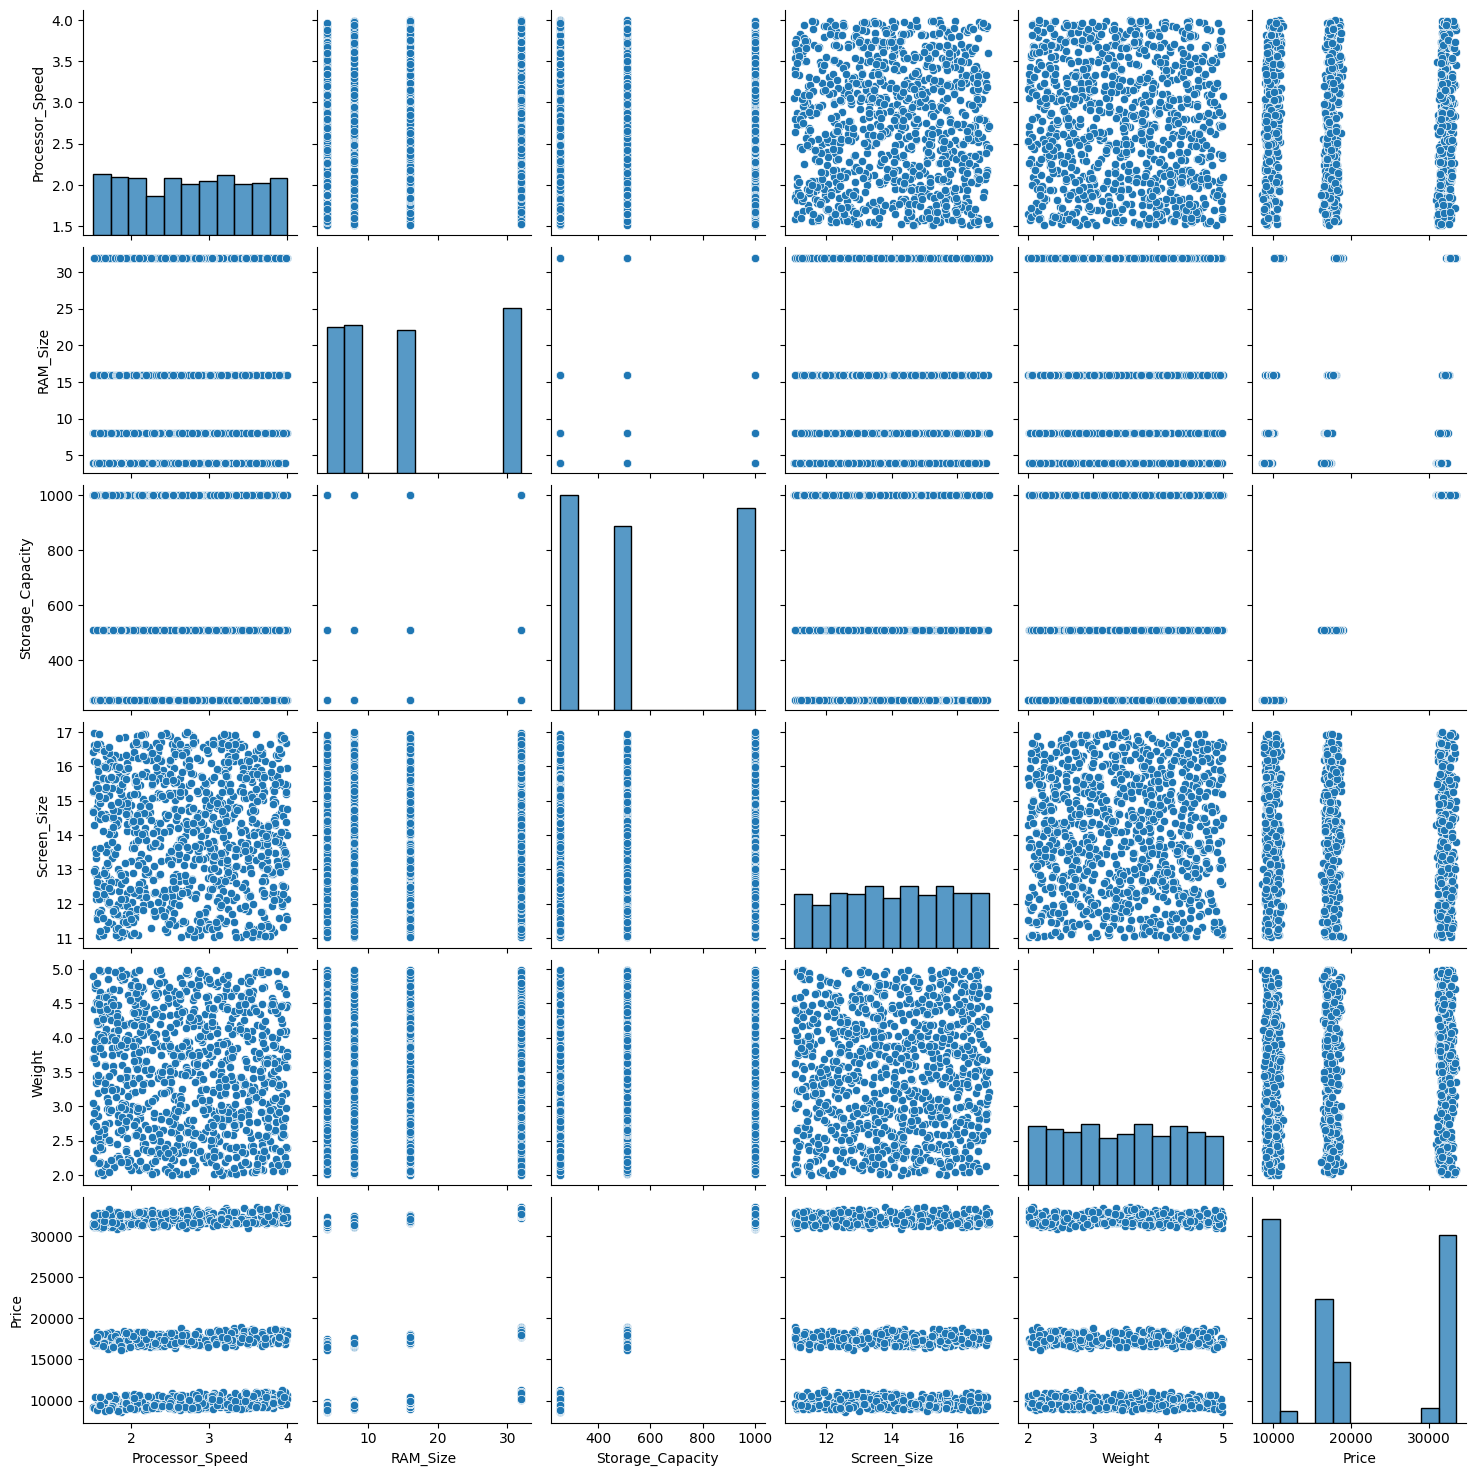

In [ ]:
sns.pairplot(data)

In [ ]:
num_c = data.select_dtypes([np.number]).columns
cat_c = data.select_dtypes(object).columns

<Axes: xlabel='Price'>

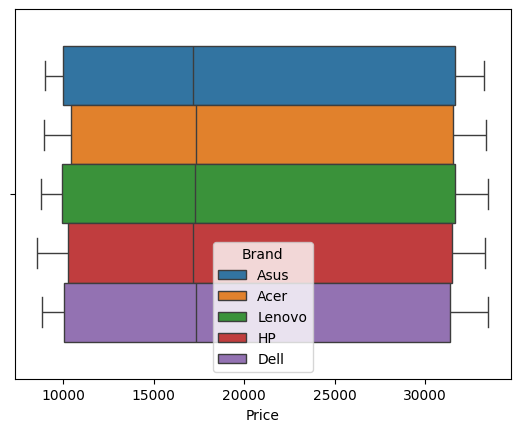

In [ ]:
sns.boxplot(x = data['Price'], hue = data['Brand'])

<Axes: xlabel='Price'>

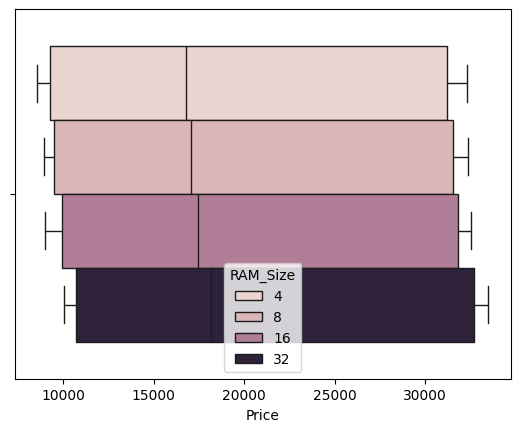

In [ ]:
sns.boxplot(x = data['Price'], hue = data['RAM_Size'])

<Axes: >

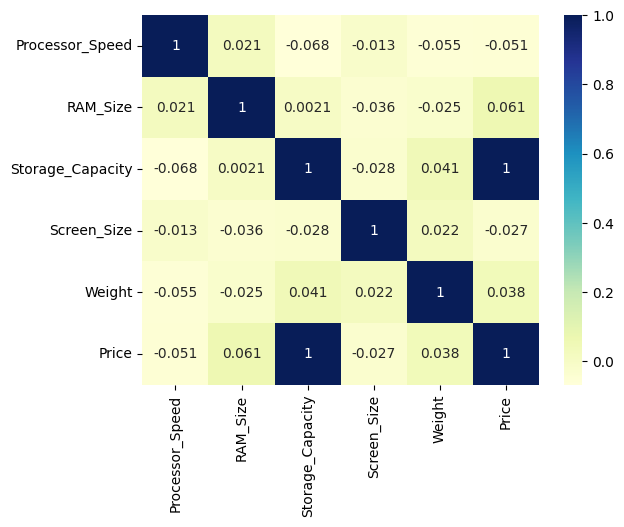

In [ ]:
sns.heatmap(data[num_c].corr(), cmap="YlGnBu", annot = True)

In [ ]:
data['Processor_Speed'].shape[0]

1000

In [ ]:
def covar(x, y):
  return (np.sum(np.multiply(x - x.mean(), y - y.mean())) / (x.shape[0]-1))
def standard_deviation(x):
  return np.sqrt(np.sum((x - x.mean())**2) / x.shape[0])
def corr(x, y):
  return (covar(x,y) / (standard_deviation(x)*standard_deviation(y)))

In [ ]:
corr(data['Price'], data['Storage_Capacity'])

0.9989067535560051

In [ ]:
def corr_matrix(X):
  corr_dict = {}
  for i in X.columns:
    corr_dict[i] = []
    for j in X.columns:
      corr_dict[i].append(corr(X[i], X[j]))
  return pd.DataFrame(corr_dict, columns=X.columns, index=X.columns)

In [ ]:
corr_matrix(data[num_c])

Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
Processor_Speed          1.001001  0.021413         -0.067644    -0.013439   
RAM_Size                 0.021413  1.001001          0.002113    -0.036038   
Storage_Capacity        -0.067644  0.002113          1.001001    -0.027588   
Screen_Size             -0.013439 -0.036038         -0.027588     1.001001   
Weight                  -0.054658 -0.025407          0.041376     0.022017   
Price                   -0.050788  0.061298          0.998907    -0.026767   

                    Weight     Price  
Processor_Speed  -0.054658 -0.050788  
RAM_Size         -0.025407  0.061298  
Storage_Capacity  0.041376  0.998907  
Screen_Size       0.022017 -0.026767  
Weight            1.001001  0.038455  
Price             0.038455  1.001001

PREPROCESS

<Axes: xlabel='Price', ylabel='Count'>

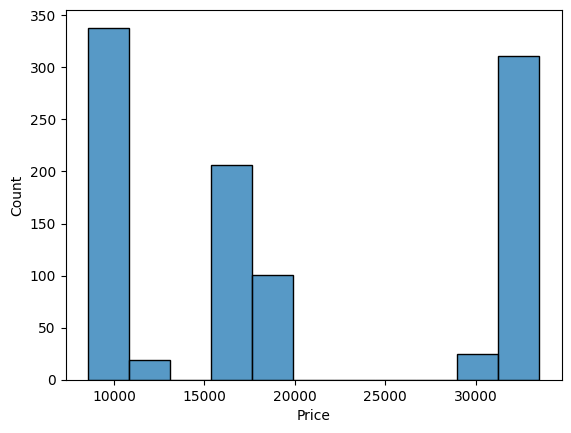

In [ ]:
sns.histplot(data = data, x = data['Price'])

In [ ]:
data = data.drop_duplicates()

<Axes: xlabel='Price', ylabel='Count'>

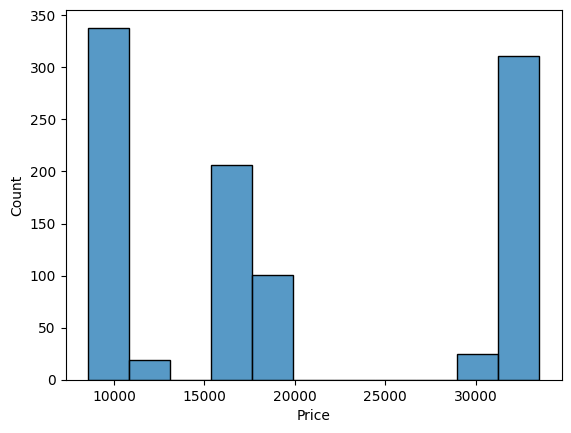

In [ ]:
sns.histplot(data = data, x = data['Price'])

In [ ]:
data[num_c] = data[num_c].fillna(data[num_c].mean())

<Axes: xlabel='Price', ylabel='Count'>

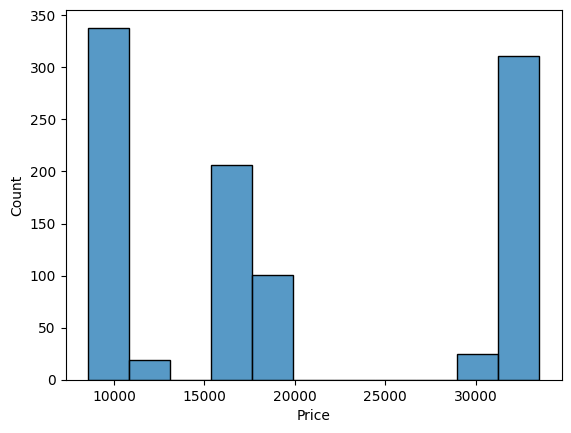

In [ ]:
sns.histplot(data = data, x = data['Price'])

In [ ]:
for i in num_c:
  data = data[(data[i] > data[i].quantile(.0001))&(data[i] < data[i].quantile(.9999))]

<Axes: xlabel='Price', ylabel='Count'>

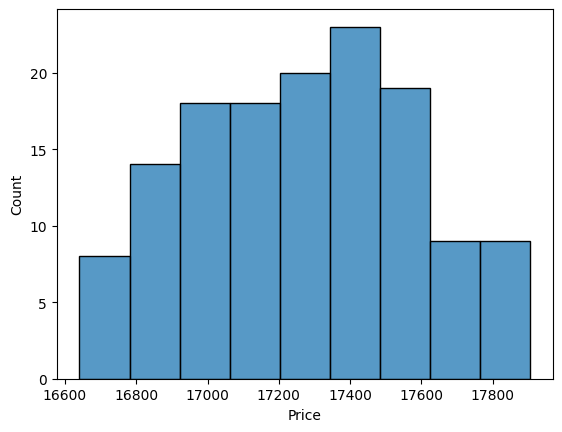

In [ ]:
sns.histplot(data = data, x = data['Price'])

Нельзя тут квантили

In [ ]:
data = pd.read_csv("/content/content/MyDrive/Laptop_price.csv")

<Axes: xlabel='Price', ylabel='Count'>

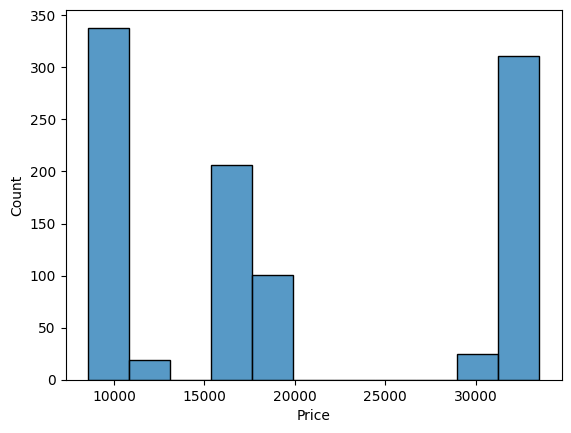

In [ ]:
data = data.drop_duplicates()
data[num_c] = data[num_c].fillna(data[num_c].mean())
sns.histplot(data = data, x = data['Price'])

In [ ]:
data['Price'] = pd.cut(data['Price'], bins = [0, 15000, 25000, 35000], labels = ['low', 'mid', 'high'])

In [ ]:
data.sample(5)

Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
0      Asus         3.830296        16               512    11.185147   
72     Acer         3.654464         4               256    15.685975   
598    Acer         2.342508        32              1000    12.045460   
684  Lenovo         3.544586         4              1000    11.038611   
3      Acer         3.806248        16               512    12.280360   

       Weight Price  
0    2.641094   mid  
72   2.104818   low  
598  4.657742  high  
684  4.409735  high  
3    4.573865   mid

In [ ]:
X = data.drop('Price', axis = 1)
y = data['Price']

Не нашел инфо гейн реализованный

In [ ]:
def entropy(X):
  return -(sum((x / X.shape[0]) * (np.log2(x / X.shape[0])) for x in X.value_counts().loc[lambda y : y > 0]))
def info_gain(X, y):
  return entropy(y) - sum((X[X == x].shape[0] / X.shape[0]) * entropy(y[X==x]) for x in X.unique())
def gain_ratio(X, y):
  return (info_gain(X, y) / entropy(X))

In [ ]:
gain_ratio(X['Storage_Capacity'], y)

1.0

In [ ]:
gain_ratio(X['Brand'], y)

0.0029052834177467376

In [ ]:
data = pd.read_csv("/content/content/MyDrive/Laptop_price.csv")
num_c = data.select_dtypes([np.number]).columns
cat_c = data.select_dtypes(object).columns
data = data.drop_duplicates()
data[num_c] = data[num_c].fillna(data[num_c].mean())
data['Price'] = pd.cut(data['Price'], bins = [0, 10000, 30000, 35000], labels = ['low', 'mid', 'high'])
X = data.drop('Price', axis = 1)
y = data['Price']

In [ ]:
gain_ratio(X['Storage_Capacity'], y)

0.7746146754920848

In [ ]:
gain_ratio(X['Brand'], y)

0.002226761350412282